## Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :¶

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

In [1]:
#import des bibliothèques qui pourront nous servir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#option pour voir les noms des colonnes en entier des DataBases
pd.set_option('display.max_colwidth',None)


#ouverture mode read des fichiers .csv
df_country_series = pd.read_csv('EdStatsCountry-Series.csv')
df_country = pd.read_csv('EdStatsCountry.csv')
df_data = pd.read_csv('EdStatsData.csv')
df_footnote = pd.read_csv('EdStatsFootNote.csv')
df_series = pd.read_csv('EdStatsSeries.csv')

### 1ere étape :

- Valider la qualité de ce jeu de données(comporte-t-il beaucoup de données manquantes, dupliquées ?)

- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

In [2]:
#création d'une fonction pour avoir des informations sur une base de données

def info(data):
    print(data.head())
    print('-'*80)
    print(data.shape)
    print('-'*80)
    print('proportion de valeur(s) manquante(s)',data.isna().mean())
    print('-'*80)
    print(data.dtypes)
    print('-'*80)
    print('doublon(s)',data.duplicated().sum())

In [3]:
info(df_country_series)

  CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                                DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population Prospects         NaN  
1   Data sources: United Nations World Population Prospects         NaN  
2   Data sources: United Nations World Population Prospects         NaN  
3                        Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population Prospects         NaN  
--------------------------------------------------------------------------------
(613, 4)
--------------------------------------------------------------------------------
proportion de valeur(s) manquante(s) CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64
----------------------------------------

In [4]:
info(df_country)

  Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                                                                                                                                                                                                                       Special Notes  \
0                                                                                                     

[]

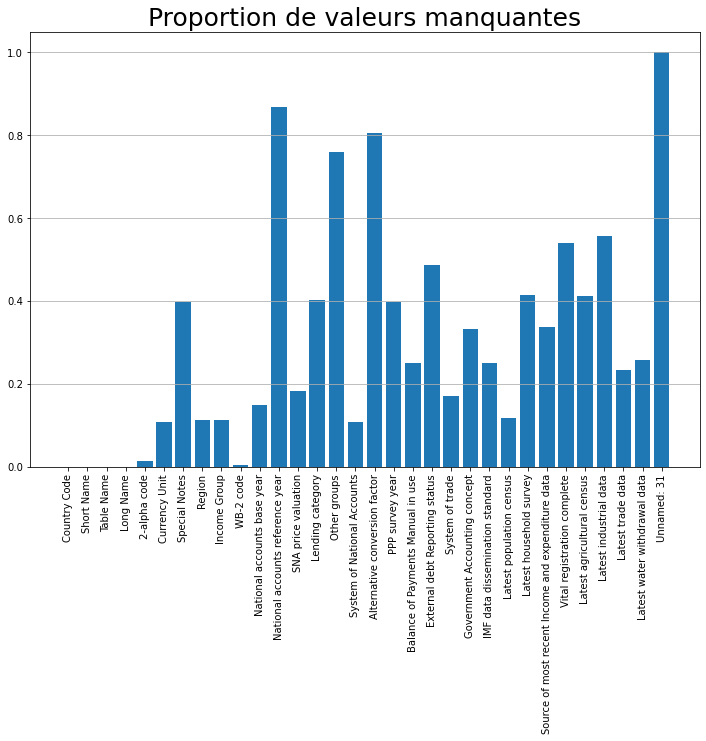

In [5]:
#proportion de valeurs manquantes par colonne du jeu 'EdStatsCountry'
plt.figure(figsize=[12,8])
plt.title('Proportion de valeurs manquantes',fontsize=25)
plt.bar(height=df_country.isna().mean(),x=df_country.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

[]

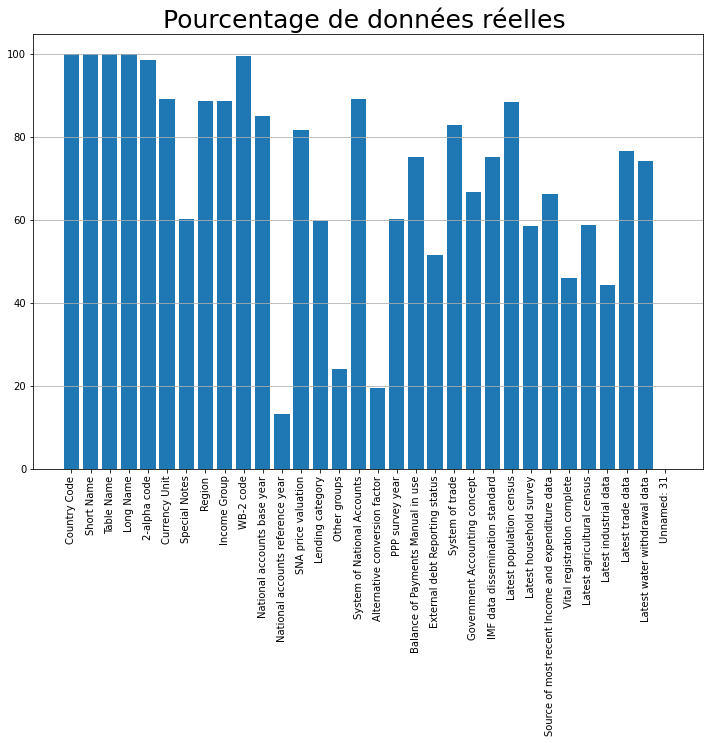

In [6]:
#pourcentage de données par colonne du jeu 'EdStatsCountry'
plt.figure(figsize=[12,8])
plt.title('Pourcentage de données réelles ',fontsize=25)
plt.bar(height=(1-df_country.isna().mean())*100,x=df_country.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

In [7]:
info(df_data)

  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                                            Indicator Name  \
0             Adjusted net enrolment rate, lower secondary, both sexes (%)   
1                 Adjusted net enrolment rate, lower secondary, female (%)   
2  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3                   Adjusted net enrolment rate, lower secondary, male (%)   
4                     Adjusted net enrolment rate, primary, both sexes (%)   

   Indicator Code       1970       1971       1972       1973       1974  \
0      UIS.NERA.2        NaN        NaN        NaN        NaN        NaN   
1    UIS.NERA.2.F        NaN        NaN        NaN        NaN        NaN   
2  UIS.NERA.2.GPI        NaN        NaN        NaN        NaN        NaN   
3    UIS.NERA.2.M        NaN        NaN 

[]

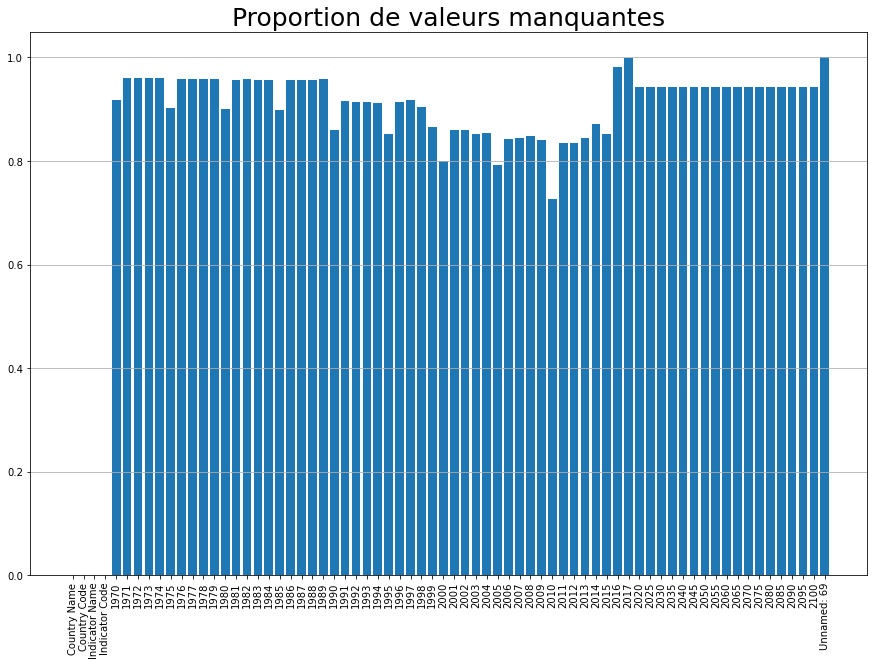

In [8]:
#proportion de valeurs manquantes par colonne du jeu 'EdStatsData'
plt.figure(figsize=[15,10])
plt.title('Proportion de valeurs manquantes',fontsize=25)
plt.bar(height=df_data.isna().mean(),x=df_data.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

[]

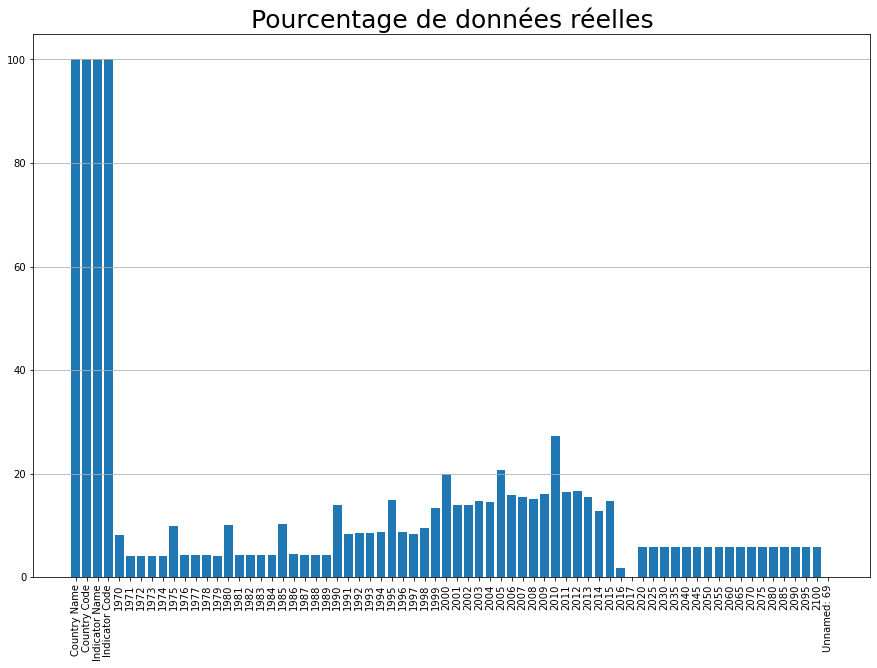

In [9]:
#pourcentage de données par colonne du jeu 'EdStatsData'
plt.figure(figsize=[15,10])
plt.title('Pourcentage de données réelles',fontsize=25)
plt.bar(height=(1-df_data.isna().mean())*100,x=df_data.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

In [10]:
#création d'autres colonnes par tranche de 10 ans
df_data_copy =df_data.copy()

def data_tranche(annee):
    df_data_copy[str(annee)+'-'+str(annee+9)] = df_data_copy[[str(i) for i in range(annee,annee+9,1)]].mean(1)
    return df_data_copy[str(annee)+'-'+str(annee+9)]

#1970 -1980 -1990 -2000 -2010 
for j in range(4):
   data_tranche(1970+10*j)

#problème on n'a pas les années 2018-2019
df_data_copy['2010-2019']= df_data_copy[[str(i) for i in range(2010,2017) ]].mean(1)

# on va regarder 2020-2029 ( on a seulement les données de 2020 et 2025)
df_data_copy['2020-2029']= df_data_copy[[str(i) for i in [2020,2025]]].mean(1)

# 2030-2039
df_data_copy['2030-2039']= df_data_copy[[str(i) for i in [2030,2035]]].mean(1)

# 2040- 2049
df_data_copy['2040-2049']= df_data_copy[[str(i) for i in [2040,2045]]].mean(1)

df_data_copy.head(1)

Country Name Country Code  \
0   Arab World          ARB   

                                                 Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)   

  Indicator Code  1970  1971  1972  1973  1974  1975  ...  2100  Unnamed: 69  \
0     UIS.NERA.2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN          NaN   

   1970-1979  1980-1989  1990-1999  2000-2009  2010-2019  2020-2029  \
0        NaN        NaN        NaN        NaN        NaN        NaN   

   2030-2039  2040-2049  
0        NaN        NaN  

[1 rows x 78 columns]

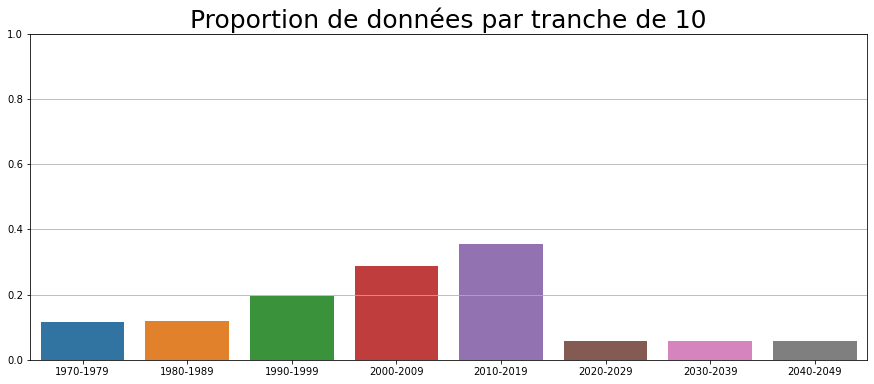

In [10]:
# je représente graphiquement la proportion de données par tranche de 10 ans
plt.figure(figsize=(15, 6))
plt.title('Proportion de données par tranche de 10',fontsize=25)
sns.barplot(y = 1 - df_data_copy[list(df_data_copy.loc[:,'1970-1979':'2040-2049'])].isna().mean(),
            x = df_data_copy[list(df_data_copy.loc[:,'1970-1979':'2040-2049'])].columns)
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

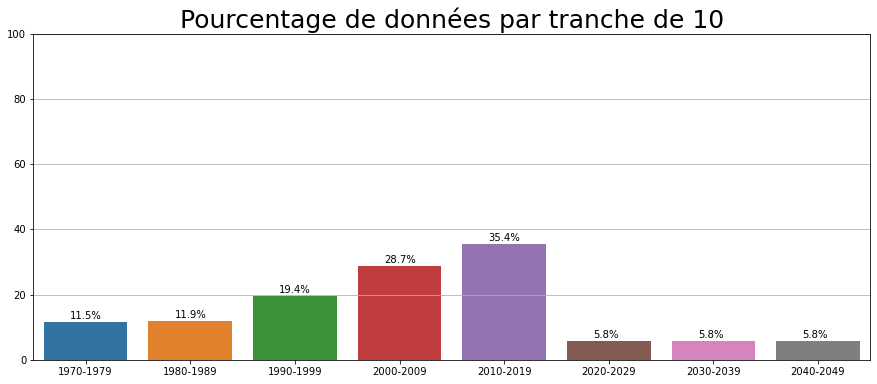

In [11]:
# je représente graphiquement le pourcentage de données par tranche de 10 ans
plt.figure(figsize=(15, 6))
plt.title('Pourcentage de données par tranche de 10',fontsize=25)
ax=sns.barplot(y = (1 - df_data_copy[list(df_data_copy.loc[:,'1970-1979':'2040-2049'])].isna().mean())*100,
            x = df_data_copy[list(df_data_copy.loc[:,'1970-1979':'2040-2049'])].columns)
plt.ylim(0,100)

for p in ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()+0.25
    txt_y = p.get_height()+1
    ax.text(txt_x,txt_y,txt)

plt.grid(axis='y')
plt.show()

In [12]:
# création colonne 2010-2015
df_data_copy['2010-2015']= df_data_copy[[str(i) for i in [2010,2015]]].mean(1)

# on supprime les colonnes inutiles

df_data_copy.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999','2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019'
                  ,'2020-2029','2030-2039','2040-2049'], axis=1, inplace=True)

df_data_copy.head(1)

Country Name Country Code  \
0   Arab World          ARB   

                                                 Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)   

  Indicator Code  2000  2001  2002  2003  2004  2005  ...  2007  2008  2009  \
0     UIS.NERA.2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

   2010  2011  2012  2013  2014  2015  2010-2015  
0   NaN   NaN   NaN   NaN   NaN   NaN        NaN  

[1 rows x 21 columns]

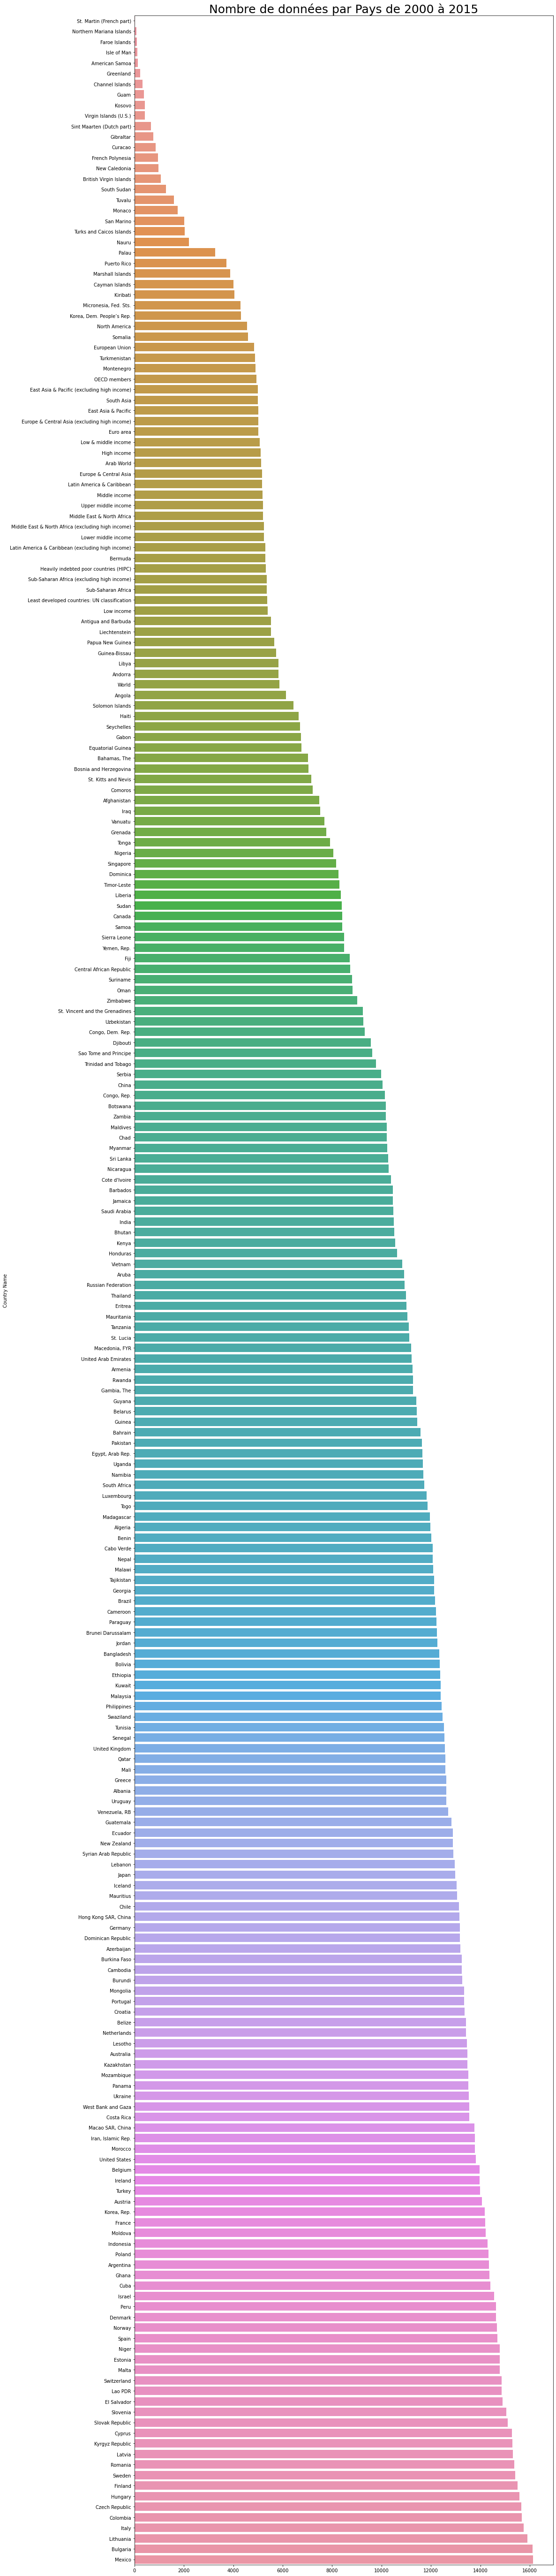

In [13]:
#nombre de données par pays
plt.figure(figsize=(16, 100))
plt.title('Nombre de données par Pays de 2000 à 2015', fontsize=25)
sns.barplot(x = df_data_copy.groupby('Country Name')[['2000','2001','2002','2003','2004',
                                                     '2005','2006','2007','2008','2009',
                                                    '2010','2011','2012','2013','2014','2015']].count().sum(axis=1).sort_values().values, 
                   y = df_data_copy.groupby('Country Name')[['2000','2001','2002','2003','2004',
                                                     '2005','2006','2007','2008','2009',
                                                    '2010','2011','2012','2013','2014','2015']].count().sum(axis=1).sort_values().index)
plt.show()

In [14]:
info(df_footnote)

  CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN
--------------------------------------------------------------------------------
(643638, 5)
--------------------------------------------------------------------------------
proportion de valeur(s) manquante(s) CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64
--------------------------------------------------------------------------------
CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object
-------------------------------------------

In [15]:
info(df_series)

           Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                                           Indicator Name  \
0  Barro-Lee: Percentage of female population age 15-19 with no education   
1         Barro-Lee: Percentage of population age 15-19 with no education   
2    Barro-Lee: Percentage of female population age 15+ with no education   
3           Barro-Lee: Percentage of population age 15+ with no education   
4  Barro-Lee: Percentage of female population age 20-24 with no education   

                                              Short definition  \
0  Percentage of female population age 15-19 with no education   
1         Percentage of population age 15-19 with no education   
2    Percentage of female population age 15+ with no education   
3           Percentage of population age 15+

[]

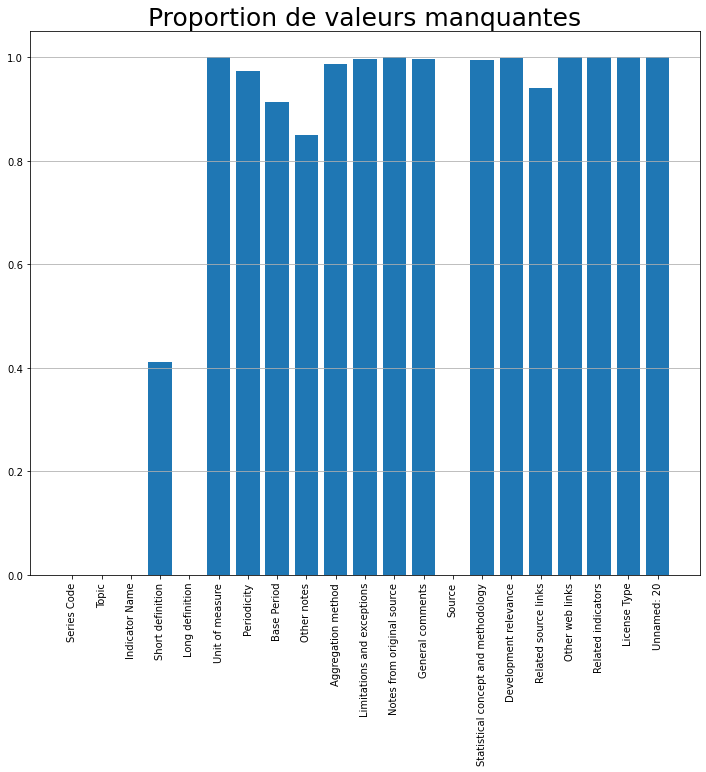

In [16]:
#proportion de valeurs manquantes par colonne du jeu 'EdStatsSeries'
plt.figure(figsize=[12,10])
plt.title('Proportion de valeurs manquantes',fontsize=25)
plt.bar(height=df_series.isna().mean(),x=df_series.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

[]

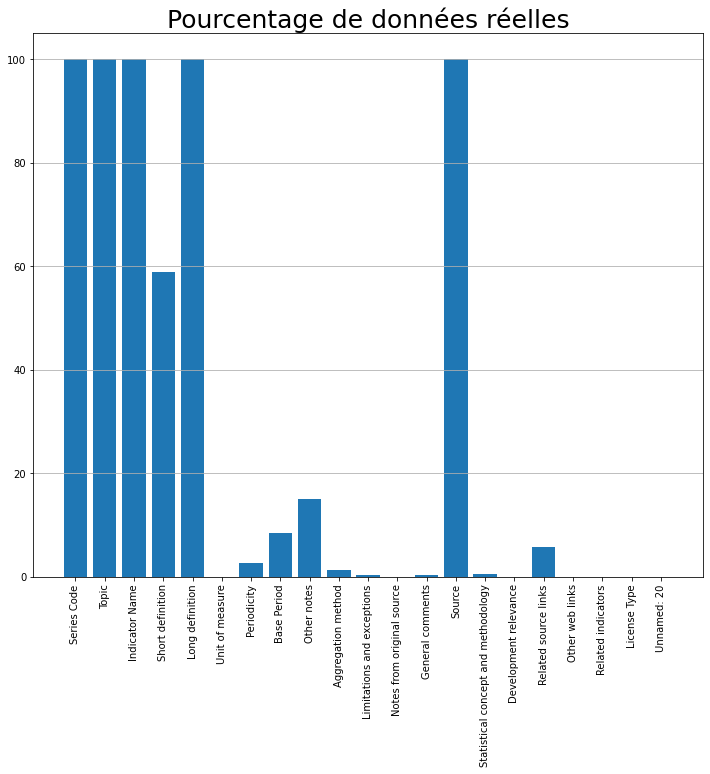

In [17]:
#pourcentage de données par colonne du jeu 'EdStatsSeries'
plt.figure(figsize=[12,10])
plt.title('Pourcentage de données réelles',fontsize=25)
plt.bar(height=(1-df_series.isna().mean())*100,x=df_series.columns)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.plot()

## Bilan

- Le jeu de données contient beaucoup de valeurs manquantes. Il faudra se placer sur la tranche d'années 2000-2015.
- Il n'y a pas de doublon
- Nous avons bien les pays et les indicateurs

==> Il va falloir choisir des indicateurs pertinents


In [18]:
#Nous pouvons regouper plusieurs fichiers pour avoir une liste de pays selon la richesse
#Cela pourrait être utile pour la suite

df_income = pd.merge(df_data_copy, df_country[['Country Code','Income Group']]
                           ,on='Country Code', how='left')
df_income.head(1)

Country Name Country Code  \
0   Arab World          ARB   

                                                 Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)   

  Indicator Code  2000  2001  2002  2003  2004  2005  ...  2008  2009  2010  \
0     UIS.NERA.2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

   2011  2012  2013  2014  2015  2010-2015  Income Group  
0   NaN   NaN   NaN   NaN   NaN        NaN           NaN  

[1 rows x 22 columns]

In [19]:
#nous avons plusieurs groupes d'income
df_income.groupby('Income Group')['Country Code'].nunique()

Income Group
High income: OECD       31
High income: nonOECD    44
Low income              34
Lower middle income     50
Upper middle income     55
Name: Country Code, dtype: int64

In [20]:
#liste des pays High income
pd.unique(df_income.loc[df_income['Income Group'].isin(['High income: OECD','High income: nonOECD']),'Country Name'].tolist())

array(['Andorra', 'Antigua and Barbuda', 'Aruba', 'Australia', 'Austria',
       'Bahamas, The', 'Bahrain', 'Barbados', 'Belgium', 'Bermuda',
       'Brunei Darussalam', 'Canada', 'Cayman Islands', 'Channel Islands',
       'Chile', 'Croatia', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Equatorial Guinea', 'Estonia', 'Faroe Islands',
       'Finland', 'France', 'French Polynesia', 'Germany', 'Greece',
       'Greenland', 'Guam', 'Hong Kong SAR, China', 'Iceland', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Kuwait',
       'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Macao SAR, China', 'Malta', 'Monaco', 'Netherlands',
       'New Caledonia', 'New Zealand', 'Northern Mariana Islands',
       'Norway', 'Oman', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Russian Federation', 'San Marino', 'Saudi Arabia', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovak Republic', 'Slovenia',
       'Spain', 'St. Kitts and Ne

In [21]:
#liste des pays middle income
pd.unique(df_income.loc[df_income['Income Group'].isin(['Lower middle income','Upper middle income']),'Country Name'].tolist())

array(['Albania', 'Algeria', 'American Samoa', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Cabo Verde', 'Cameroon', 'China', 'Colombia', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Cuba', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Fiji', 'Gabon', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guyana', 'Honduras', 'Hungary', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kiribati', 'Kosovo', 'Kyrgyz Republic', 'Lao PDR', 'Lebanon',
       'Lesotho', 'Libya', 'Macedonia, FYR', 'Malaysia', 'Maldives',
       'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro',
       'Morocco', 'Namibia', 'Nicaragua', 'Nigeria', 'Pakistan', 'Palau',
       'Panama', 'Papua New

In [22]:
#liste des pays low income
pd.unique(df_income.loc[df_income['Income Group'].isin(['Low income']),'Country Name'].tolist())

array(['Afghanistan', 'Bangladesh', 'Benin', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Eritrea', 'Ethiopia', 'Gambia, The', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Kenya', 'Korea, Dem. People’s Rep.',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Myanmar',
       'Nepal', 'Niger', 'Rwanda', 'Sierra Leone', 'Somalia',
       'Tajikistan', 'Tanzania', 'Togo', 'Uganda', 'Zimbabwe'],
      dtype=object)

## 2eme étape

- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)

PS : Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.


In [23]:
df_data_copy.head(1)

Country Name Country Code  \
0   Arab World          ARB   

                                                 Indicator Name  \
0  Adjusted net enrolment rate, lower secondary, both sexes (%)   

  Indicator Code  2000  2001  2002  2003  2004  2005  ...  2007  2008  2009  \
0     UIS.NERA.2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   

   2010  2011  2012  2013  2014  2015  2010-2015  
0   NaN   NaN   NaN   NaN   NaN   NaN        NaN  

[1 rows x 21 columns]

In [24]:
df_data_copy = df_data_copy.drop(['Country Code','Indicator Code'],axis=1)
df_data_copy.head(1)

Country Name                                                Indicator Name  \
0   Arab World  Adjusted net enrolment rate, lower secondary, both sexes (%)   

   2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2012  2013  2014  2015  2010-2015  
0   NaN   NaN   NaN   NaN        NaN

In [25]:
df_data_copy[['Indicator Name','2010-2015']].groupby('Indicator Name').count().sort_values(by='2010-2015',ascending=False)

2010-2015
Indicator Name                                                                                        
Population growth (annual %)                                                                       240
Population, total                                                                                  240
GDP at market prices (current US$)                                                                 229
GDP per capita (current US$)                                                                       229
Internet users (per 100 people)                                                                    228
...                                                                                                ...
EGRA: Listening Comprehension - Share of students with a zero score (%). Silozi. 2nd Grade           0
EGRA: Listening Comprehension - Share of students with a zero score (%). Songhoi. 2nd Grade          0
EGRA: Listening Comprehension - Share of students with a zero score (%). Spanish. 2nd Grade          0
EGRA: Listening Comprehension - Share of students with a zero score (%). Spanish. 3rd Grade          0
PASEC: Mean performance on the mathematics scale for 6th grade students. Male                        0

[3665 rows x 1 columns]

### Les indicateurs que j'ai gardé :

Population jeune entre 15-24 qui peuvent potentiellement utiliser internet pour chercher du contenu de formation lycée-bac+ : 
'Population, ages 15-24, total'

Inscriptions lycéens et enseignement sup. : 
'Enrolment in upper secondary general, both sexes (number)' 
'Enrolment in tertiary education, all programmes, both sexes (number)'

Utilisateurs d'internet : 
'Internet users (per 100 people)'

Richesse : 
'GNI per capita, PPP (current international $)' ==> revenu national brut par habitant


In [26]:
#création d'une liste d'indicateurs :
indicateurs = [
    'Population, ages 15-24, total',
    'Enrolment in upper secondary general, both sexes (number)',
    'Enrolment in tertiary education, all programmes, both sexes (number)',
    'Internet users (per 100 people)',
    'GNI per capita, PPP (current international $)'
]

In [27]:
#nombre de données pour les indicateurs choisis :
df_data_copy[df_data_copy['Indicator Name'].isin(indicateurs)][['Indicator Name','2010-2015']].groupby(['Indicator Name']).count().sort_values(by='2010-2015',ascending=False)

2010-2015
Indicator Name                                                                 
Internet users (per 100 people)                                             228
GNI per capita, PPP (current international $)                               213
Enrolment in upper secondary general, both sexes (number)                   185
Enrolment in tertiary education, all programmes, both sexes (number)        181
Population, ages 15-24, total                                               181

In [28]:
#on garde seulement nos indicateurs :
df_data_copy=df_data_copy[df_data_copy['Indicator Name'].isin(indicateurs)]
df_data_copy.head()

Country Name  \
1204   Arab World   
1220   Arab World   
1252   Arab World   
1375   Arab World   
2482   Arab World   

                                                            Indicator Name  \
1204  Enrolment in tertiary education, all programmes, both sexes (number)   
1220             Enrolment in upper secondary general, both sexes (number)   
1252                         GNI per capita, PPP (current international $)   
1375                                       Internet users (per 100 people)   
2482                                         Population, ages 15-24, total   

              2000          2001          2002          2003          2004  \
1204  5.089854e+06  5.400639e+06  5.798696e+06  5.955514e+06  6.465715e+06   
1220  5.656668e+06  6.083158e+06  6.313384e+06  7.004977e+06  7.493570e+06   
1252  8.966476e+03  9.224633e+03  9.256850e+03  9.831654e+03  1.059090e+04   
1375  1.139541e+00  1.561288e+00  2.693061e+00  3.645881e+00  7.006812e+00   
2482           NaN           NaN           NaN           NaN           NaN   

              2005          2006          2007          2008          2009  \
1204  6.899156e+06  7.214648e+06  7.588664e+06  8.006892e+06  8.382284e+06   
1220  7.748103e+06  7.991074e+06  8.037326e+06  8.128524e+06  8.157572e+06   
1252  1.136948e+04  1.235684e+04  1.313271e+04  1.382449e+04  1.385250e+04   
1375  8.393142e+00  1.165465e+01  1.420590e+01  1.859353e+01  2.297369e+01   
2482           NaN           NaN           NaN           NaN           NaN   

              2010          2011          2012          2013       2014  2015  \
1204  8.715273e+06  8.594488e+06  9.147083e+06  9.688632e+06  9966484.0   NaN   
1220  8.506002e+06  9.190047e+06  9.568954e+06  9.550892e+06  9621427.0   NaN   
1252  1.428402e+04  1.499616e+04  1.584650e+04  1.614156e+04        NaN   NaN   
1375  2.674725e+01  2.970776e+01  3.401422e+01  3.686860e+01        NaN   NaN   
2482           NaN           NaN           NaN           NaN        NaN   NaN   

         2010-2015  
1204  8.715273e+06  
1220  8.506002e+06  
1252  1.428402e+04  
1375  2.674725e+01  
2482           NaN

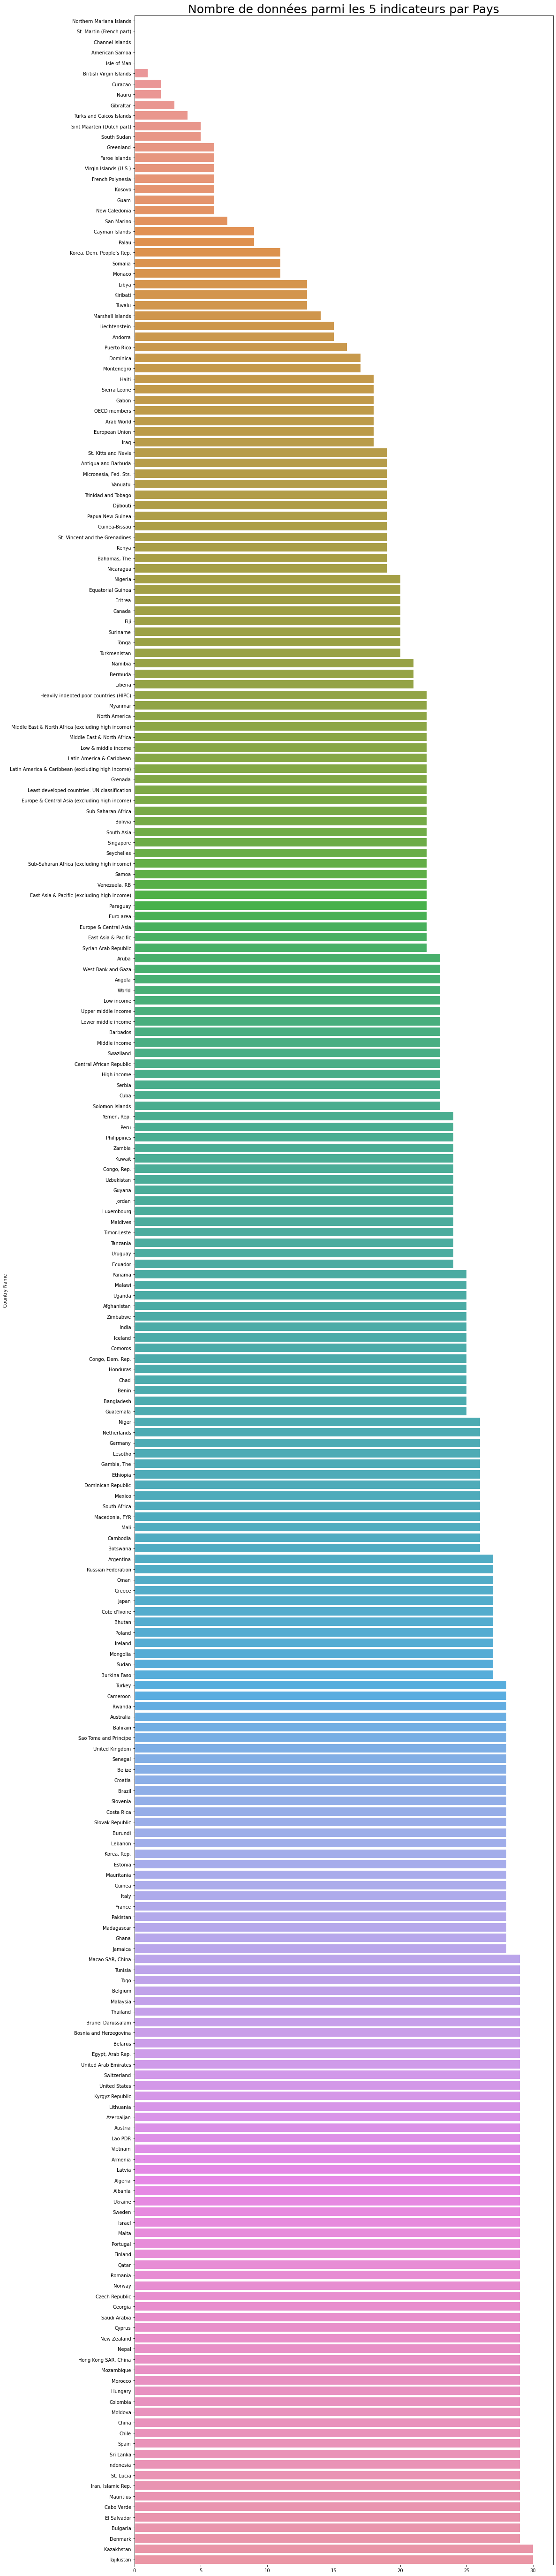

In [29]:
#nombre de données par pays 
plt.figure(figsize=(16, 100))
plt.title('Nombre de données parmi les 5 indicateurs par Pays', fontsize=25)
sns.barplot(x = df_data_copy.groupby('Country Name')[['2010','2011','2012','2013','2014','2015']].count().sum(axis=1).sort_values().values, 
                   y = df_data_copy.groupby('Country Name')[['2010','2011','2012','2013','2014','2015']].count().sum(axis=1).sort_values().index)
plt.show()

In [30]:
#création d'une liste de pays 2010-2015
pays = df_data_copy.groupby('Country Name')[['2010','2011','2012','2013','2014','2015']].count().sum(axis=1).reset_index(name='count')
list_pays=pays.loc[pays['count']>=24,'Country Name'].tolist()

list_pays

['Afghanistan',
 'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Honduras',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Rep.',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Korea, Rep.',
 'Kuwait',
 'Kyrgyz Republic',
 'Lao PDR',
 'Latvia',

In [31]:
#réduction dataFrame par pays
df_pays= df_data_copy[df_data_copy['Country Name'].isin(list_pays)]
df_pays.head(5)

Country Name  \
92829  Afghanistan   
92845  Afghanistan   
92877  Afghanistan   
93000  Afghanistan   
94107  Afghanistan   

                                                             Indicator Name  \
92829  Enrolment in tertiary education, all programmes, both sexes (number)   
92845             Enrolment in upper secondary general, both sexes (number)   
92877                         GNI per capita, PPP (current international $)   
93000                                       Internet users (per 100 people)   
94107                                         Population, ages 15-24, total   

            2000          2001          2002          2003          2004  \
92829        NaN           NaN           NaN  2.621100e+04  2.764800e+04   
92845        NaN  1.599520e+05  1.077330e+05  1.136900e+05  1.705910e+05   
92877        NaN           NaN  8.700000e+02  9.200000e+02  9.200000e+02   
93000        NaN  4.722568e-03  4.561395e-03  8.789125e-02  1.058090e-01   
94107  3979438.0  4.122669e+06  4.293057e+06  4.486256e+06  4.694142e+06   

               2005          2006       2007        2008        2009  \
92829           NaN           NaN        NaN         NaN    95185.00   
92845  1.810930e+05           NaN   277890.0   351477.00   420291.00   
92877  1.010000e+03  1.070000e+03     1210.0     1250.00     1490.00   
93000  1.224148e+00  2.107124e+00        1.9        1.84        3.55   
94107  4.910340e+06  5.134377e+06  5367499.0  5606736.00  5848604.00   

            2010       2011          2012       2013       2014        2015  \
92829        NaN    97504.0           NaN        NaN   262874.0         NaN   
92845   555906.0   725320.0  8.579960e+05   939747.0   943750.0         NaN   
92877     1590.0     1680.0  1.900000e+03     1900.0     1890.0     1880.00   
93000        4.0        5.0  5.454545e+00        5.9        7.0        8.26   
94107  6090239.0  6330684.0  6.569239e+06  6803785.0  7032072.0  7252785.00   

        2010-2015  
92829         NaN  
92845   555906.00  
92877     1735.00  
93000        6.13  
94107  6671512.00

In [32]:
#réduction low income
low_income =pd.unique(df_income.loc[df_income['Income Group'].isin(['Lower middle income','Low income']),'Country Name'].tolist())
df_pays.shape

(690, 19)

In [33]:
df_pays = df_pays[~df_pays['Country Name'].isin(low_income)]
df_pays.shape

(400, 19)

Text(0.5, 0, 'GNI per capita, PPP (current international $)')

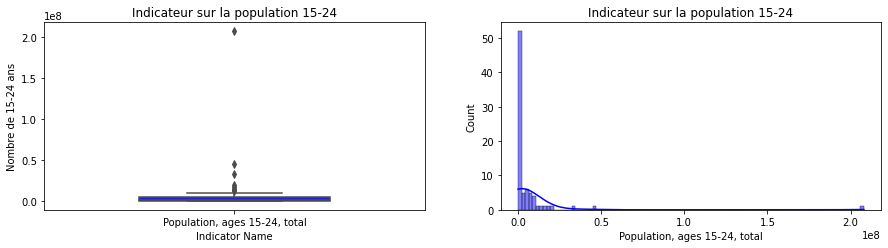

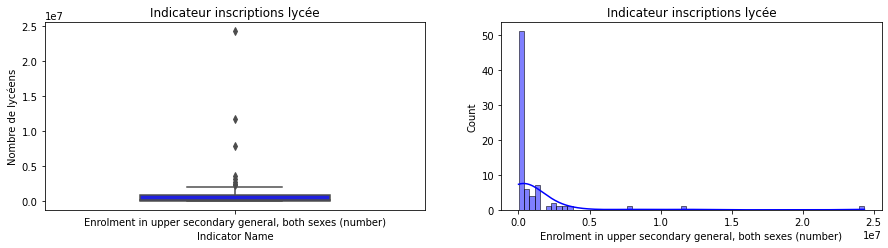

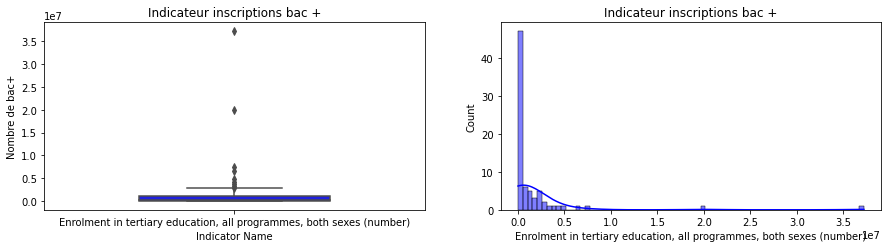

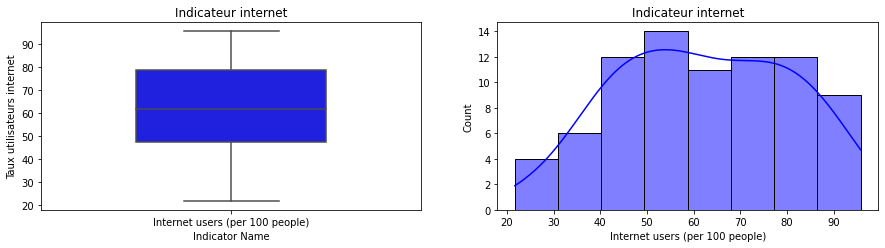

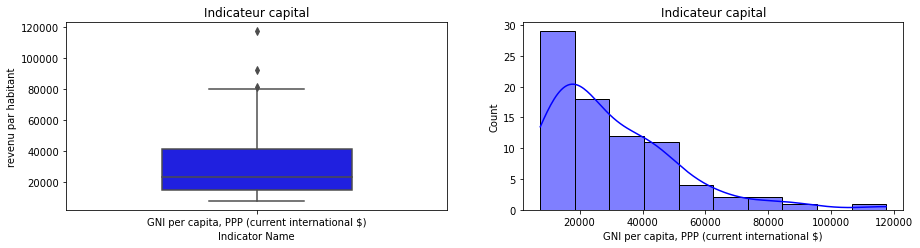

In [34]:
#DE 2010 à 2015

#indicateur : 'Population, ages 15-24, total'
plt.figure(figsize = (15, 20))

plt.subplot(5,2,1)
sns.boxplot( x=df_pays.loc[df_pays['Indicator Name'] =='Population, ages 15-24, total','Indicator Name'],
            y=df_pays.loc[df_pays['Indicator Name'] =='Population, ages 15-24, total','2010-2015'], width=0.5, color='Blue')
plt.title('Indicateur sur la population 15-24')
plt.ylabel('Nombre de 15-24 ans')

plt.subplot(5,2,2)
sns.histplot(df_pays.loc[df_pays['Indicator Name'] =='Population, ages 15-24, total','2010-2015'], kde = True, color='Blue')
plt.title('Indicateur sur la population 15-24')
plt.xlabel('Population, ages 15-24, total')


#indicateur : 'Enrolment in upper secondary general, both sexes (number)'
plt.figure(figsize = (15, 20))

plt.subplot(5,2,3)
sns.boxplot( x=df_pays.loc[df_pays['Indicator Name'] =='Enrolment in upper secondary general, both sexes (number)','Indicator Name'],
            y=df_pays.loc[df_pays['Indicator Name'] =='Enrolment in upper secondary general, both sexes (number)','2010-2015'], width=0.5, color='Blue')
plt.title('Indicateur inscriptions lycée')
plt.ylabel('Nombre de lycéens')

plt.subplot(5,2,4)
sns.histplot(df_pays.loc[df_pays['Indicator Name'] =='Enrolment in upper secondary general, both sexes (number)','2010-2015'], kde = True, color='Blue')
plt.title('Indicateur inscriptions lycée')
plt.xlabel('Enrolment in upper secondary general, both sexes (number)')


#indicateur : 'Enrolment in tertiary education, all programmes, both sexes (number)'
plt.figure(figsize = (15, 20))

plt.subplot(5,2,5)
sns.boxplot( x=df_pays.loc[df_pays['Indicator Name'] =='Enrolment in tertiary education, all programmes, both sexes (number)','Indicator Name'],
            y=df_pays.loc[df_pays['Indicator Name'] =='Enrolment in tertiary education, all programmes, both sexes (number)','2010-2015'], width=0.5, color='Blue')
plt.title('Indicateur inscriptions bac +')
plt.ylabel('Nombre de bac+')

plt.subplot(5,2,6)
sns.histplot(df_pays.loc[df_pays['Indicator Name'] =='Enrolment in tertiary education, all programmes, both sexes (number)','2010-2015'], kde = True, color='Blue')
plt.title('Indicateur inscriptions bac +')
plt.xlabel('Enrolment in tertiary education, all programmes, both sexes (number)')


#indicateur : 'Internet users (per 100 people)'
plt.figure(figsize = (15, 20))

plt.subplot(5,2,7)
sns.boxplot( x=df_pays.loc[df_pays['Indicator Name'] =='Internet users (per 100 people)','Indicator Name'],
            y=df_pays.loc[df_pays['Indicator Name'] =='Internet users (per 100 people)','2010-2015'], width=0.5, color='Blue')
plt.title('Indicateur internet')
plt.ylabel('Taux utilisateurs internet')

plt.subplot(5,2,8)
sns.histplot(df_pays.loc[df_pays['Indicator Name'] =='Internet users (per 100 people)','2010-2015'], kde = True, color='Blue')
plt.title('Indicateur internet')
plt.xlabel('Internet users (per 100 people)')


#indicateur : 'GNI per capita, PPP (current international $)'
plt.figure(figsize = (15, 20))

plt.subplot(5,2,9)
sns.boxplot( x=df_pays.loc[df_pays['Indicator Name'] =='GNI per capita, PPP (current international $)','Indicator Name'],
            y=df_pays.loc[df_pays['Indicator Name'] =='GNI per capita, PPP (current international $)','2010-2015'], width=0.5, color='Blue')
plt.title('Indicateur capital')
plt.ylabel('revenu par habitant')

plt.subplot(5,2,10)
sns.histplot(df_pays.loc[df_pays['Indicator Name'] =='GNI per capita, PPP (current international $)','2010-2015'], kde = True, color='Blue')
plt.title('Indicateur capital')
plt.xlabel('GNI per capita, PPP (current international $)')

In [35]:
#création dataFrame avec les indicateurs en tête de  colonne

modalites = pd.unique(df_pays['Country Name'].tolist())
tab= pd.DataFrame(modalites,columns=['Country Name'])
tab['Population, ages 15-24, total']=df_pays.loc[df_pays['Indicator Name']
                =='Population, ages 15-24, total','2010-2015'].values
tab['Enrolment in upper secondary general, both sexes (number)']=df_pays.loc[df_pays['Indicator Name']
                =='Enrolment in upper secondary general, both sexes (number)','2010-2015'].values
tab['Enrolment in tertiary education, all programmes, both sexes (number)']=df_pays.loc[df_pays['Indicator Name']
                =='Enrolment in tertiary education, all programmes, both sexes (number)','2010-2015'].values
tab['Internet users (per 100 people)']=df_pays.loc[df_pays['Indicator Name']
                =='Internet users (per 100 people)','2010-2015'].values
tab['GNI per capita, PPP (current international $)']=df_pays.loc[df_pays['Indicator Name']
                =='GNI per capita, PPP (current international $)','2010-2015'].values

tab

Country Name  Population, ages 15-24, total  \
0                Albania                       582362.5   
1                Algeria                      6856791.0   
2              Argentina                      6857425.5   
3              Australia                      2914467.5   
4                Austria                       986599.5   
..                   ...                            ...   
75                Turkey                     13790650.5   
76  United Arab Emirates                       713576.5   
77        United Kingdom                      7883418.0   
78         United States                     45142303.0   
79               Uruguay                       517629.0   

    Enrolment in upper secondary general, both sexes (number)  \
0                                                    120651.0   
1                                                   1172409.0   
2                                                   1520478.0   
3                                                    519854.0   
4                                                     88935.0   
..                                                        ...   
75                                                  1999045.0   
76                                                   123785.0   
77                                                  2347703.0   
78                                                 11701279.0   
79                                                    79311.0   

    Enrolment in tertiary education, all programmes, both sexes (number)  \
0                                                           1.414265e+05   
1                                                           1.216872e+06   
2                                                           2.520985e+06   
3                                                           1.276488e+06   
4                                                           3.880793e+05   
..                                                                   ...   
75                                                          4.796110e+06   
76                                                          1.292595e+05   
77                                                          2.479197e+06   
78                                                          1.997972e+07   
79                                                          1.544715e+05   

    Internet users (per 100 people)  \
0                         54.126466   
1                         25.350000   
2                         56.521532   
3                         80.280260   
4                         79.555071   
..                              ...   
75                        46.782490   
76                        79.250000   
77                        88.500150   
78                        73.122101   
79                        55.500000   

    GNI per capita, PPP (current international $)  
0                                         10445.0  
1                                         13375.0  
2                                         18850.0  
3                                         41590.0  
4                                         46080.0  
..                                            ...  
75                                        20555.0  
76                                        63565.0  
77                                        38695.0  
78                                        53390.0  
79                                        18340.0  

[80 rows x 6 columns]

In [36]:
#je remplace les Nan par la valeur médiane


def fillmedian(column):
    tab.loc[tab[str(column)].isna(),str(column)]=tab[str(column)].median()

fillmedian('Population, ages 15-24, total')
fillmedian('Enrolment in upper secondary general, both sexes (number)')
fillmedian('Enrolment in tertiary education, all programmes, both sexes (number)')
fillmedian('Internet users (per 100 people)')
fillmedian('GNI per capita, PPP (current international $)')

tab

Country Name  Population, ages 15-24, total  \
0                Albania                       582362.5   
1                Algeria                      6856791.0   
2              Argentina                      6857425.5   
3              Australia                      2914467.5   
4                Austria                       986599.5   
..                   ...                            ...   
75                Turkey                     13790650.5   
76  United Arab Emirates                       713576.5   
77        United Kingdom                      7883418.0   
78         United States                     45142303.0   
79               Uruguay                       517629.0   

    Enrolment in upper secondary general, both sexes (number)  \
0                                                    120651.0   
1                                                   1172409.0   
2                                                   1520478.0   
3                                                    519854.0   
4                                                     88935.0   
..                                                        ...   
75                                                  1999045.0   
76                                                   123785.0   
77                                                  2347703.0   
78                                                 11701279.0   
79                                                    79311.0   

    Enrolment in tertiary education, all programmes, both sexes (number)  \
0                                                           1.414265e+05   
1                                                           1.216872e+06   
2                                                           2.520985e+06   
3                                                           1.276488e+06   
4                                                           3.880793e+05   
..                                                                   ...   
75                                                          4.796110e+06   
76                                                          1.292595e+05   
77                                                          2.479197e+06   
78                                                          1.997972e+07   
79                                                          1.544715e+05   

    Internet users (per 100 people)  \
0                         54.126466   
1                         25.350000   
2                         56.521532   
3                         80.280260   
4                         79.555071   
..                              ...   
75                        46.782490   
76                        79.250000   
77                        88.500150   
78                        73.122101   
79                        55.500000   

    GNI per capita, PPP (current international $)  
0                                         10445.0  
1                                         13375.0  
2                                         18850.0  
3                                         41590.0  
4                                         46080.0  
..                                            ...  
75                                        20555.0  
76                                        63565.0  
77                                        38695.0  
78                                        53390.0  
79                                        18340.0  

[80 rows x 6 columns]

In [37]:
#remplir les valeurs du tableau par des proportions 

def proportion_tab(column):
    tab[str(column)]=tab[str(column)]/tab[str(column)].max()
    
proportion_tab('Population, ages 15-24, total')
proportion_tab('Enrolment in upper secondary general, both sexes (number)')
proportion_tab('Enrolment in tertiary education, all programmes, both sexes (number)')
proportion_tab('Internet users (per 100 people)')
proportion_tab('GNI per capita, PPP (current international $)')

tab

Country Name  Population, ages 15-24, total  \
0                Albania                       0.002800   
1                Algeria                       0.032965   
2              Argentina                       0.032968   
3              Australia                       0.014012   
4                Austria                       0.004743   
..                   ...                            ...   
75                Turkey                       0.066301   
76  United Arab Emirates                       0.003431   
77        United Kingdom                       0.037901   
78         United States                       0.217030   
79               Uruguay                       0.002489   

    Enrolment in upper secondary general, both sexes (number)  \
0                                                    0.004955   
1                                                    0.048150   
2                                                    0.062445   
3                                                    0.021350   
4                                                    0.003653   
..                                                        ...   
75                                                   0.082100   
76                                                   0.005084   
77                                                   0.096419   
78                                                   0.480567   
79                                                   0.003257   

    Enrolment in tertiary education, all programmes, both sexes (number)  \
0                                                               0.003801   
1                                                               0.032705   
2                                                               0.067756   
3                                                               0.034308   
4                                                               0.010430   
..                                                                   ...   
75                                                              0.128903   
76                                                              0.003474   
77                                                              0.066632   
78                                                              0.536987   
79                                                              0.004152   

    Internet users (per 100 people)  \
0                          0.565024   
1                          0.264628   
2                          0.590026   
3                          0.838042   
4                          0.830472   
..                              ...   
75                         0.488360   
76                         0.827287   
77                         0.923849   
78                         0.763319   
79                         0.579362   

    GNI per capita, PPP (current international $)  
0                                        0.088920  
1                                        0.113864  
2                                        0.160473  
3                                        0.354063  
4                                        0.392287  
..                                            ...  
75                                       0.174988  
76                                       0.541140  
77                                       0.329417  
78                                       0.454518  
79                                       0.156132  

[80 rows x 6 columns]

In [38]:
#création score : moyenne pondérée

tab['Score'] = (tab['Population, ages 15-24, total']*4+
                        tab['Enrolment in upper secondary general, both sexes (number)']*2+
                        tab['Enrolment in tertiary education, all programmes, both sexes (number)']*3+
                        tab['Internet users (per 100 people)']*4+
                        tab['GNI per capita, PPP (current international $)'])/14

tab.head()

Country Name  Population, ages 15-24, total  \
0      Albania                       0.002800   
1      Algeria                       0.032965   
2    Argentina                       0.032968   
3    Australia                       0.014012   
4      Austria                       0.004743   

   Enrolment in upper secondary general, both sexes (number)  \
0                                                   0.004955   
1                                                   0.048150   
2                                                   0.062445   
3                                                   0.021350   
4                                                   0.003653   

   Enrolment in tertiary education, all programmes, both sexes (number)  \
0                                                              0.003801   
1                                                              0.032705   
2                                                              0.067756   
3                                                              0.034308   
4                                                              0.010430   

   Internet users (per 100 people)  \
0                         0.565024   
1                         0.264628   
2                         0.590026   
3                         0.838042   
4                         0.830472   

   GNI per capita, PPP (current international $)     Score  
0                                       0.088920  0.170109  
1                                       0.113864  0.107047  
2                                       0.160473  0.212901  
3                                       0.354063  0.279136  
4                                       0.392287  0.269410

In [39]:
#Voici la liste des pays avec un fort potentiel 
tab.sort_values('Score',ascending=False).iloc[:10]


Country Name  Population, ages 15-24, total  \
16           China                       1.000000   
78   United States                       0.217030   
38           Japan                       0.059602   
77  United Kingdom                       0.037901   
56          Norway                       0.003060   
46      Luxembourg                       0.000302   
28         Germany                       0.043440   
41     Korea, Rep.                       0.031433   
62           Qatar                       0.000594   
32         Iceland                       0.000215   

    Enrolment in upper secondary general, both sexes (number)  \
16                                                   1.000000   
78                                                   0.480567   
38                                                   0.114878   
77                                                   0.096419   
56                                                   0.004609   
46                                                   0.000354   
28                                                   0.054717   
41                                                   0.061749   
62                                                   0.001294   
32                                                   0.000601   

    Enrolment in tertiary education, all programmes, both sexes (number)  \
16                                                              1.000000   
78                                                              0.536987   
38                                                              0.103107   
77                                                              0.066632   
56                                                              0.006624   
46                                                              0.000144   
28                                                              0.080033   
41                                                              0.087854   
62                                                              0.000561   
32                                                              0.000485   

    Internet users (per 100 people)  \
16                         0.441568   
78                         0.763319   
38                         0.883491   
77                         0.923849   
56                         0.992746   
46                         0.981022   
28                         0.885170   
41                         0.904790   
62                         0.844954   
32                         1.000000   

    GNI per capita, PPP (current international $)     Score  
16                                       0.100924  0.776228  
78                                       0.454518  0.496286  
38                                       0.332567  0.331716  
77                                       0.329417  0.326368  
56                                       0.526965  0.324234  
46                                       0.556847  0.320235  
28                                       0.379262  0.317374  
41                                       0.276380  0.314881  
62                                       1.000000  0.313319  
32                                       0.338484  0.310143

In [40]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)


fig.add_trace(go.Scatterpolar(
      name = "China",
      r = [1.0,1.0, 1.0, 0.441568, 0.100924],
      theta = ["15-24", "UpSecond",
               "Tertiary", "Internet users", "GNI per capita"],
    ), 1, 1)

fig.add_trace(go.Scatterpolar(
      name = "United States",
      r = [0.217030,0.480567, 0.536987, 0.763319, 0.454518],
      theta = ["15-24", "UpSecond",
               "Tertiary", "Internet users", "GNI per capita"],
    ), 1, 2)

fig.add_trace(go.Scatterpolar(
      name = "Japan",
      r = [0.059602,0.114878, 0.103107, 0.883491, 0.332567],
      theta = ["15-24", "UpSecond",
               "Tertiary", "Internet users", "GNI per capita"],
    ), 2, 1)

fig.update_traces(fill='toself')
fig.show()

In [41]:
top = ['China','United States','Japan','United Kingdom','Norway',
       'Luxembourg','Germany','Korea, Rep.','Qatar','Iceland']

In [42]:
df_evolution = df_data_copy.copy()
df_evolution.head(1)

Country Name  \
1204   Arab World   

                                                            Indicator Name  \
1204  Enrolment in tertiary education, all programmes, both sexes (number)   

           2000       2001       2002       2003       2004       2005  \
1204  5089853.5  5400639.0  5798696.5  5955514.0  6465715.0  6899156.0   

           2006       2007       2008       2009       2010       2011  \
1204  7214648.0  7588664.0  8006891.5  8382284.5  8715273.0  8594488.0   

           2012       2013       2014  2015  2010-2015  
1204  9147083.0  9688632.0  9966484.0   NaN  8715273.0

In [43]:
df_evolution=df_evolution[df_evolution['Country Name'].isin(top)]
df_evolution

Country Name  \
243094           China   
243110           China   
243142           China   
243265           China   
244372           China   
356709         Germany   
356725         Germany   
356757         Germany   
356880         Germany   
357987         Germany   
411684         Iceland   
411700         Iceland   
411732         Iceland   
411855         Iceland   
412962         Iceland   
448334           Japan   
448350           Japan   
448382           Japan   
448505           Japan   
449612           Japan   
470324     Korea, Rep.   
470340     Korea, Rep.   
470372     Korea, Rep.   
470495     Korea, Rep.   
471602     Korea, Rep.   
514304      Luxembourg   
514320      Luxembourg   
514352      Luxembourg   
514475      Luxembourg   
515582      Luxembourg   
627919          Norway   
627935          Norway   
627967          Norway   
628090          Norway   
629197          Norway   
671899           Qatar   
671915           Qatar   
671947           Qatar   
672070           Qatar   
673177           Qatar   
844154  United Kingdom   
844170  United Kingdom   
844202  United Kingdom   
844325  United Kingdom   
845432  United Kingdom   
847819   United States   
847835   United States   
847867   United States   
847990   United States   
849097   United States   

                                                              Indicator Name  \
243094  Enrolment in tertiary education, all programmes, both sexes (number)   
243110             Enrolment in upper secondary general, both sexes (number)   
243142                         GNI per capita, PPP (current international $)   
243265                                       Internet users (per 100 people)   
244372                                         Population, ages 15-24, total   
356709  Enrolment in tertiary education, all programmes, both sexes (number)   
356725             Enrolment in upper secondary general, both sexes (number)   
356757                         GNI per capita, PPP (current international $)   
356880                                       Internet users (per 100 people)   
357987                                         Population, ages 15-24, total   
411684  Enrolment in tertiary education, all programmes, both sexes (number)   
411700             Enrolment in upper secondary general, both sexes (number)   
411732                         GNI per capita, PPP (current international $)   
411855                                       Internet users (per 100 people)   
412962                                         Population, ages 15-24, total   
448334  Enrolment in tertiary education, all programmes, both sexes (number)   
448350             Enrolment in upper secondary general, both sexes (number)   
448382                         GNI per capita, PPP (current international $)   
448505                                       Internet users (per 100 people)   
449612                                         Population, ages 15-24, total   
470324  Enrolment in tertiary education, all programmes, both sexes (number)   
470340             Enrolment in upper secondary general, both sexes (number)   
470372                         GNI per capita, PPP (current international $)   
470495                                       Internet users (per 100 people)   
471602                                         Population, ages 15-24, total   
514304  Enrolment in tertiary education, all programmes, both sexes (number)   
514320             Enrolment in upper secondary general, both sexes (number)   
514352                         GNI per capita, PPP (current international $)   
514475                                       Internet users (per 100 people)   
515582                                         Population, ages 15-24, total   
627919  Enrolment in tertiary education, all programmes, both sexes (number)   
627935             Enrolment in upper secondary general, both sexes (number)   
627967                         GNI per capi

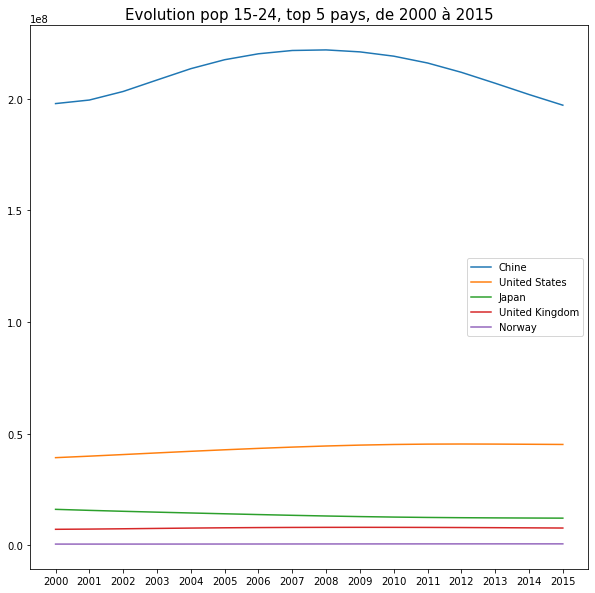

In [44]:
plt.figure(figsize=(10,10))

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[1.97746762e+08, 1.99336400e+08, 2.03174053e+08, 2.08304084e+08,
        2.13378536e+08, 2.17382824e+08, 2.20042486e+08, 2.21519350e+08,
        2.21774704e+08, 2.20892800e+08, 2.18974009e+08, 2.15914397e+08,
        2.11735888e+08, 2.06846521e+08, 2.01802535e+08, 1.97026759e+08],label='Chine')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[39234056., 39908939., 40626820., 41361164., 42080588., 42759049.,
        43388523., 43962362., 44459126., 44855382., 45137089., 45296141.,
        45343097., 45307415., 45230846., 45147517.],label='United States')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[16099722., 15642234., 15223627., 14837565., 14469713., 14110659.,
        13759822., 13425972., 13119358., 12853503., 12637132., 12472916.,
        12355023., 12272803., 12211081., 12157426.],label='Japan')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[7162142., 7259790., 7398785., 7558904., 7713211., 7841484.,
        7936414., 8000333., 8034786., 8044972., 8035314., 8005514.,
        7955051., 7888589., 7812258., 7731522.],label='United Kingdom')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[542787., 542741., 546291., 552812., 561353., 571101., 581865.,
        593495., 605251., 616259., 625849., 633739., 639879., 644142.,
        646489., 646961.],label='Norway')

plt.title('Evolution pop 15-24, top 5 pays, de 2000 à 2015',fontsize=15)
plt.legend()

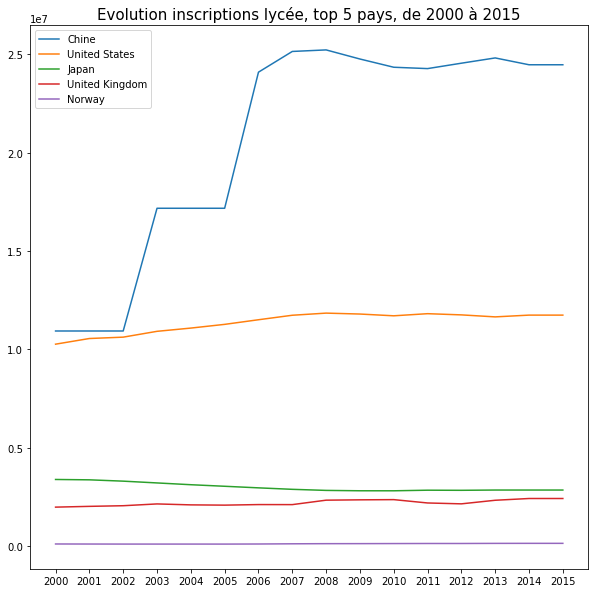

In [45]:
plt.figure(figsize=(10,10))

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[10928602.,10928602.,10928602., 17173322.,17173322.,17173322.,
        24098100., 25152642., 25231140., 24767944., 24348916., 24280180.,
        24554732., 24822886., 24475374.,24475374.],label='Chine')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[10258032., 10545792., 10615360., 10911610., 11076851., 11265712.,
        11500820., 11729600., 11838025., 11791063., 11701279., 11809382.,
        11748263., 11646415., 11736315.,11736315.],label='United States')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[3373321., 3355157., 3287778., 3197166., 3106385., 3027279.,
        2946880., 2871948., 2817310., 2798284., 2797163., 2827504.,
        2821937., 2835697.,2835697.,2835697.],label='Japan')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[1965708.  , 2005234.  , 2037835.  , 2128873.  , 2080768.  ,
        2067192.  , 2095946.  , 2093713.  , 2319766.  , 2337577.  ,
        2347703.  , 2177731.  , 2133072.  , 2315417.  , 2404846.25,
               2404846.25],label='United Kingdom')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[ 91086.,  88253.,  86149.,  85658.,  86136.,  85233.,  89783.,
        100234., 106848., 108250., 112215., 115777., 115946., 121294.,
        123082.,123082.],label='Norway')

plt.title('Evolution inscriptions lycée, top 5 pays, de 2000 à 2015',fontsize=15)
plt.legend()

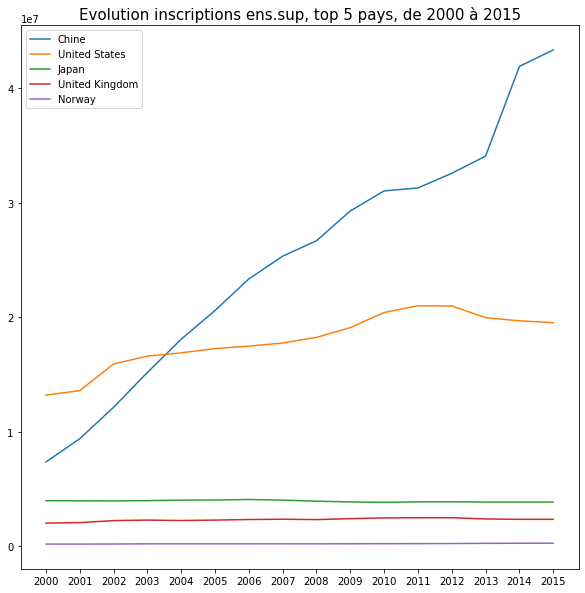

In [46]:
plt.figure(figsize=(10,10))

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[ 7364111.,  9398581., 12143723., 15186217., 18090814., 20601220.,
        23360536., 25346280., 26691696., 29295840., 31046736., 31308378.,
        32585960., 34091288., 41924200., 43367392.],label='Chine')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[13202880., 13595580., 15927987., 16611711., 16900472., 17272044.,
        17487476., 17758870., 18248124., 19102814., 20427708., 21016126.,
        20994112., 19972624., 19700220., 19531728.],label='United States')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[3982069., 3972468., 3966667., 3984400., 4031604., 4038302.,
        4084861., 4032625., 3938632., 3874224., 3836314., 3880544.,
        3884638., 3862749., 3862460.,3862460.],label='Japan')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[2024138.  , 2067349.  , 2240680.  , 2287833.  , 2247441.  ,
        2287541.  , 2336111.  , 2362815.  , 2329494.  , 2415222.  ,
        2479197.  , 2492284.  , 2495779.  , 2386199.  , 2352932.75,
               2352932.75],label='United Kingdom')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[190943., 190054., 197064., 212395., 213845., 213940., 214711.,
        215237., 212672., 219282., 224706., 229743., 238224., 255416.,
        264207., 268231.],label='Norway')

plt.title('Evolution inscriptions ens.sup, top 5 pays, de 2000 à 2015',fontsize=15)
plt.legend()

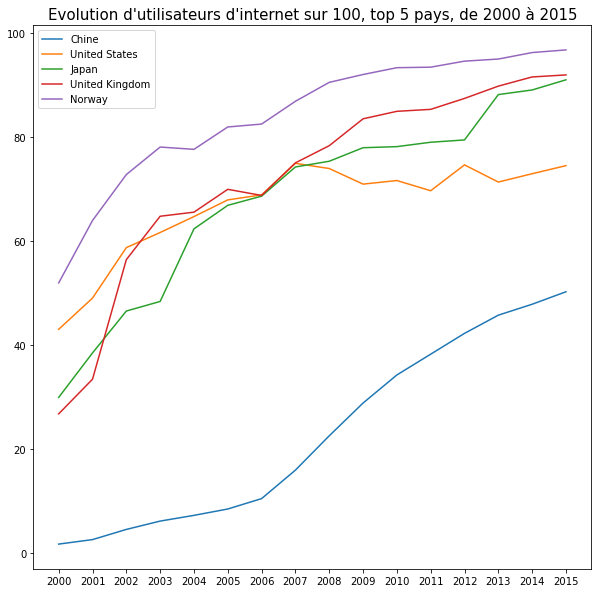

In [47]:
plt.figure(figsize=(10,10))

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[ 1.77591321,  2.63965022,  4.59570433,  6.2       ,  7.3       ,
         8.523257  , 10.52315262, 16.        , 22.6       , 28.9       ,
        34.3       , 38.3       , 42.30011749, 45.8       , 47.9       ,
        50.3       ],label='Chine')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[43.07916264, 49.08083159, 58.78540388, 61.69711712, 64.75825648,
        67.96805292, 68.93119327, 75.        , 74.        , 71.        ,
        71.69      , 69.72946076, 74.7       , 71.4       , 73.        ,
        74.55420245],label='United States')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[29.99074036, 38.53206086, 46.59420112, 48.43526589, 62.39392963,
        66.9210661 , 68.68527032, 74.3       , 75.4       , 78.        ,
        78.21      , 79.05411352, 79.4964    , 88.21942891, 89.10683302,
        91.05802839],label='Japan')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[26.82175435, 33.48109487, 56.48      , 64.82      , 65.61      ,
        70.        , 68.82      , 75.09      , 78.39      , 83.56      ,
        85.        , 85.37999855, 87.47999842, 89.8441    , 91.61      ,
        92.0003    ],label='United Kingdom')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[52.        , 64.        , 72.84      , 78.13      , 77.69      ,
        81.99      , 82.55      , 86.93      , 90.57      , 92.08      ,
        93.39      , 93.48998265, 94.64997805, 95.0534    , 96.3       ,
        96.8103    ],label='Norway')

plt.title('Evolution d\'utilisateurs d\'internet sur 100, top 5 pays, de 2000 à 2015',fontsize=15)
plt.legend()

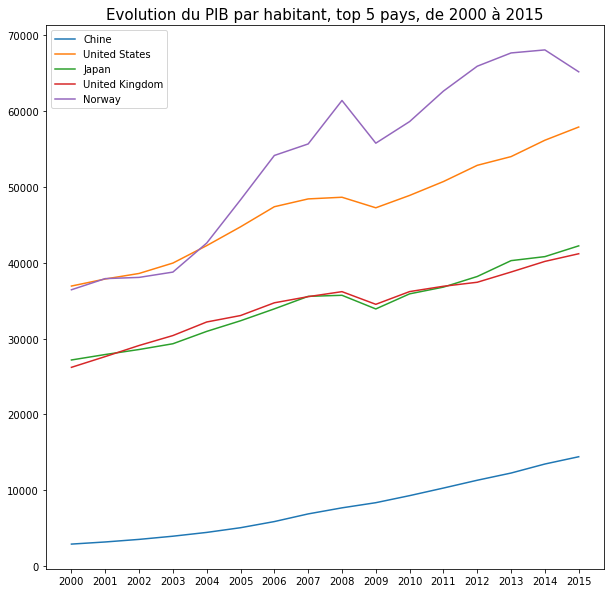

In [48]:
plt.figure(figsize=(10,10))

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[ 2900.,  3180.,  3520.,  3940.,  4440.,  5060.,  5870.,  6880.,
         7680.,  8360.,  9290., 10290., 11320., 12270., 13460., 14420.],label='Chine')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[36930., 37860., 38590., 39960., 42260., 44740., 47390., 48420.,
        48640., 47250., 48880., 50710., 52850., 54000., 56160., 57900.],label='United States')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[27180., 27900., 28560., 29320., 30950., 32350., 33920., 35570.,
        35710., 33910., 35900., 36790., 38190., 40280., 40810., 42230.],label='Japan')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[26210., 27630., 29090., 30400., 32190., 33040., 34720., 35530.,
        36190., 34520., 36200., 36900., 37430., 38780., 40180., 41190.],label='United Kingdom')

plt.plot(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],[36440., 37910., 38070., 38770., 42600., 48300., 54150., 55670.,
        61400., 55770., 58620., 62640., 65920., 67670., 68070., 65180.],label='Norway')

plt.title('Evolution du PIB par habitant, top 5 pays, de 2000 à 2015',fontsize=15)
plt.legend()

# BILAN


    - Quels sont les pays avec un fort potentiel de clients pour nos services ?
    
        En prenant en compte mes indicateurs, le top 10 des pays avec un fort potentiel :
        top = ['China','United States','Japan','United Kingdom','Norway',
       'Luxembourg','Germany','Korea, Rep.','Qatar','Iceland']
       
    - Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
    
        Le potentiel des 5er pays semble augmenter. Le potentiel de la Chine croît très rapidement !
        
    - Dans quels pays l'entreprise doit-elle opérer en priorité ?
        
        La Chine et les Etats-Unis
